# Ujian Tengah Semester (4)

Nama   : Clarence Chandra Sentosa

NRP  : 1973010

# Polynomial Regression

Bentuk pengembangan lain dari bentuk "Simple Linear Regression" yaitu "Polynomial Regression".

Polynomial Regression memodelkan hubungan antara independent variable  𝑥  dan dependent variable  𝑦  sebagai derajat polynomial dalam  𝑥 .

- Independent variable  𝑥  sebenarnya merupakan features.
- Dependent variable  𝑥  sebenarnya merupakan target.

# Load Boston Dataset

Seperti biasa kita akan meload terlebih dahulu boston dataset untuk mengetahui element atau atribut apa yang akan kita gunakan untuk melakukan prediksi harga rumah dengan menggunakan multiple linear regression kali ini.

Sebelumnya kita akan melihat kembali terlebih dahulu data dari boston dataset yang kita gunakan dalam kasus kali ini dan kasus sebelumnya.

In [37]:
# Code 01

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

# Sample Dataset

Saya akan menyiapkan dataset yang sudah digunakan sebelumnya untuk memprediksi harga rumah pada kali ini menggunakan "Polynomial Regression". Disini saya akan kembali memanfaatkan dataset "house", "Tax Building" atau pajak bangunan.

Dataset yang akan kita bentuk kali ini berisi daftar ukuran "jumlah kamar" atau jumlah kamar per rumah, "Tax Building" atau pajak bangunan rumah, dan 'harga' atau harga dari sebuah rumah yang akan kita tampung kedalam format pandas DataFrame. Kali ini kita akan langsung persiapkan baik training dataset dan testing datasetnya.

# Training Set

Selanjutnya saya akan menggunakan kembali suatu training set yang berisi features serta nilai dari features yang akan dibentuk dan digunakan.

In [38]:
# Code 02

import pandas as pd
import numpy as np

house = {'jumlah kamar': [1, 2, 3, 4, 5], 
         'pajak (%)': [10, 15, 25, 30, 50],
         'harga (Jt)': [100, 150, 175.5, 300, 450]}

train_house_df = pd.DataFrame(house)
train_house_df

,jumlah kamar,pajak (%),harga (Jt)
0,1,10,100.0
1,2,15,150.0
2,3,25,175.5
3,4,30,300.0
4,5,50,450.0


Proses berpikir code 02 :

- Pertama-tama kita akan mengimport mondul pandas yaitu "import pandas as pd" karena kita akan membentuk dataset dalam format pandas DataFrame.
- Lalu berikutnya, kita akan menyiapkan dataset kita. Dataset kita kali ini awalnya dibentuk dari suatu dictionary, yang terdiri dari tiga buah key yaitu "jumlah kamar", "pajak (%)", dan "harga (Jt)".
- Saya memilih nilai pajak tersebut karena rata-rata pajak sebuah rumah memiliki kurang lebih 10% sampe 50% sesuai proprosi harga rumah tersebut.
- Setiap key tersebut akan menampung list yang berisi sekumpulan bilangan yang berasosiasi dengan setiap keys tersebut.
- Lalu selanjutnya dictionary tersebut akan kita tampung ke dalam variabe "house".
- Untuk selanjutnya, dictionary ini akan kita gunakan sebagai base atau sebagai basis untuk membuat pandas DataFrame.
- Lalu selanjutnya kita panggil "pd.DataFrame(house)", artinya disini kita akan membentuk suatu pandas DataFrame dari data-data yang tersimpan dalam variabel house tersebut.
- Selanjutnnya DataFrame yang terbentuk ini akan kita tampung kedalam variabel "train_house_df".
- Lalu terakhir, kita akan mencoba tampilkan ke layar.

# Testing Set

Selanjutnya kita juga akan menggunakan teknik yang sama untuk mempersiapkan testing dataset kita. Disini tahapannya sama persis, hanya saja datanya berbeda (perhatikan pada code 02 dan 03).

In [39]:
# Code 03

house = {'jumlah kamar': [8, 7, 6, 10, 12], 
         'pajak (%)': [65, 45, 30, 75, 85],
         'harga (Jt)': [1000, 900, 875, 1100, 2000]}


test_house_df = pd.DataFrame(house)
test_house_df

,jumlah kamar,pajak (%),harga (Jt)
0,8,65,1000
1,7,45,900
2,6,30,875
3,10,75,1100
4,12,85,2000


Kedua dataset tersebut (code 02 dan code 03) sama-sama terdiri dari tiga buah kolom yaitu kolom "jumlah kamar", "pajak (%)", dan "harga (Jt)".

# Preprocessing Dataset 

Disini untuk menyederhanakan proses belajar, kita akan memangkas jumlah feature nya menjadi satu feature saja.

In [40]:
# Code 04

X_train = np.array(train_house_df['jumlah kamar']).reshape(-1, 1)
y_train = np.array(train_house_df['harga (Jt)'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[1]
 [2]
 [3]
 [4]
 [5]]

y_train: [100.  150.  175.5 300.  450. ]


Proses berpikir code 04 :

- Disini feturesnya akan kita pangkas menjadi satu feature yang dalam kasus ini yang dijadikan feature adalah "diameter" atau diameter pizzanya, tetapi targetnya prediction nya tetap sama yaitu harga pizza.
- Kita akan siapkan suatu numpy array "(train_house_df['jumlah kamar'])" karena kita hanya mau mengambil kolom jumlah kamar saja.
- Lalu berikutnya, kita perlu melakukan proses reshaping atau reshape yang dalam kasus ini (-1, 1) karena pada SkLearn untuk featuresnya itu harus berada dalam array 2 dimensi, sedangkan disini kita hanya memiliki satu kolom saja sebagai featuresnya.
- Artinya fetures yang terdiri dari satu varibel tersebut, perlu kita transformasikan kedalam array dua dimensi dengan memanfaatkan method reshape (-1, 1) lalu kita tampung kedalam variabel "X_train".
- Selanjutnya kita akan membentuk array yang kedua yang akan menampung nilai target dengan memanggil "np.array(train_house_df['harga (Jt)'] karena kolom harga tersebut akan kita gunakan sebagai target prediksinya yang akan kita tampung kedalam variabel "y_train".
- Langkah akhir, kita akan mencoba cetak ke layar baik nilai 'X_train" dan juga "y_train" nya.

Bisa kita lihat pada code 04. Walaupun nilai "X_train" nya terdiri dari satu features saja, tetapi array yang terbentuk ini tetap dalam format array 2 dimensi. Hal ini dimungkinkan karena kita memanggil method "reshape(-1, 1)".

# Polynomial Regression : Quadratic

"Polynomial Regression Quadratic" pada SkLearn dengan derajat polynomial 2 atau biasa dikenal dengan istilah "Quadratic". Selain derajat polynomial 2, bisa juga menggunakan polynomial lainnya seperti 3, 4, dan seterusnya. Hanya saja, yang paling umum ditemui adalah derajat polynomial 2 dengan 3 atau dikenal dengan "Quadratic" dan "Cubic".

# Formula

$ y = \alpha + \beta_1x + \beta_2x^2$

- Jika kita perhatikan pada formula tersebut, nilai feature nya hanya ada satu yaitu x.
- Hanya saja nilai feature yang tunggal tersebut akan kita representasikan dalam format polynomial.
- Untuk kasus kita kali ini, kita akan menggunakna polynomial derajat 2 yang berarti kita akan memiliki $x^1$ dan $x^2$.
- Untuk $x^1$ akan dikalikan dengan $\beta^1$ dan untuk $x^2$ akan kita kalikan dengan $\beta^2$.

# Polynomial Features

Untuk menerapkan polynomial regression, pertama-tama perlu dilakukannya transformasi terhadap feature dari datset yang dimiliki.

In [41]:
# Code 05

from sklearn.preprocessing import PolynomialFeatures

quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)

print(f'X_train_quadratic:\n{X_train_quadratic}\n')

X_train_quadratic:
[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]



Proses berpikir code 05 :

- Pertama-tama, import modulnya terlebih dahulu dengan memanggil "from sklearn.preprocessing import PolynomialFeatures".
- Lalu berikutnya, membentuk objek polynomial fetures nya dengan memanggil "PolynomialFeatures" dengan menyertakan parameter "(degree=2)" atau derjat polynomialnya yang dalam kasus ini nilainya adalah 2. Karena dalam kasus kita kali ini kita akan membentuk "Quadratic Polynomial Regression", maka degree nya kita beri nilai 2 lalu kita tampung kedalam variabel "quadratic_feature".
- Objek tersebut akan digunakan untuk melakukan proses transformasi terhadap dataset feature yang kita miliki. Oleh karena itu, kita memanggil "quadratic_feature.fit_transform" dengan menyertakan parameter "X_train". Lalu hasil transformasinya, akan kita tampung ke dalam variabel "X_train_quadratic".
- Variabel "X_train_quadratic" akan berisi features dari training set yang sudah ditransformasikan kedalam "Polynomial Features".
- Langkah akhir, coba untuk menampilkan hasilnya.

Bisa kita lihat pada output code 05, bahwa nilai feature yang tunggal tadi sekarang menjadi 3. Diketahui bahwa nilai pada indeks pertama adalah 1, tetapi mengapa sekarang bisa menjadi 1, 1, 1 (lihat pada output code 07). Nilai 1 diperoleh dari nilai x dipangkatkan 0 yang diketahui hasilnya adalah 1, nilai 1 diperoleh dari 1 dipangkatkan 1 adalah 1, lalu 1 dipangkatkan 1 adalah 1 dan seterusnya pada kasus kali ini.

# Training Model

Setelah memiliki polynomial features yang dibutuhkan, tahapan selanjutnya adalah memulai melakukan training model.

In [42]:
# Code 06

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_quadratic, y_train)

LinearRegression()

Proses berpikir code 06 :

- Pertama-tama kita akan mengimport terlebih dahulu modulnya "from sklearn.linear_model import LinearRegression".
- Lalu kita akan bentuk terlebih dahulu objek modelnya dengan memanggil "LinearRegression()" yang kita tampung kedalam variabel model.
- Untuk selanjutnya, objek model ini akan kita training dengan memanfaatkan nilai fetures yang sudah kita transformasikan kedalam polynomial dengan memanggil "(X_train_quadratic, y_train)". Perlu diperhatikan bahwa proses transformasi polynomialnya dikenakan pada features dan tidak dikenakan pada target.
- Bisa kita lihat pada hasil code tersebut bahwa tidak ada perbedaan antar implementasi linear regression dan polynomial regression. Yang berbeda hanyalah pada polynomial regression kita perlu melakukan transformasi features kedalam polynomial features sebelum mealkukan proses training model.

# Visualisasi Model

Selanjutnya untuk memberikan gambaran yang lebih baik terkait qudratic polynomial regression ini, akan dicoba untuk memvisualisasikan modelnya.

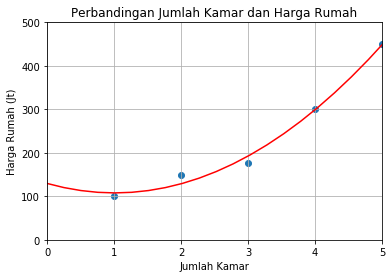

In [43]:
# Code 07

import matplotlib.pyplot as plt

X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis_quadratic = model.predict(X_vis_quadratic)

plt.scatter(X_train, y_train)
plt.plot(X_vis, y_vis_quadratic, '-r')

plt.title('Perbandingan Jumlah Kamar dan Harga Rumah')
plt.xlabel('Jumlah Kamar')
plt.ylabel('Harga Rumah (Jt)')
plt.xlim(0, 5)
plt.ylim(0, 500)
plt.grid(True)
plt.show()

Alur berpikir code 07 :
- Pertama-tama kita import terlebih dahulu mathplotlibnya.
- Selanjutnya, kita akan membentuk terlebih dahulu sederet bilangan mulai dari 0 sampai 25 sebanyak 100 data point yang akan kita tampung kedalam variabel "X_vis".
- Lalu variable "X_vis" ini akan kita kenakan proses transformasi dengan memanggil "quadratic_feature.transform(X_vis)". Disini kita tidak melakukan fit transform tetapi kita hanya melakukan transform kaena kita akan menggunakan quadratic_feature yang kita buat sebelumnya, lalu hasilnya kita tampung kedalam "X_vis_quadratic".
- Selanjutnya kita akan melakukan nilai prediksi terhadap nilai "X_vis_quadratic" dengan memanggil "model.predict(X_vis_quadratic)" yang hasilnya kita tmapung kedalam variabel "y_vis_quadratic".
- Pada kali ini yang akan kita visualisasikan ada 2 hal. Yang pertama adalah X_train dan y_train nya atau data point yang kita gunakan untuk melakukan proses trainingnya.
- Untuk data training tersebut, kita akan visualisasikan sebagai scatter plot dengan memanggil "plt.scatter" dengan menyertakan parameternya yaitu X_train serta y_train nya yang akan menghasilkan 5 titik (lihat pada hasil code 07) dan kelima titik tersebut merepresentasikan 5 data point pada training set.
- Lalu berikutnya kita akan memploting hasil prediksi dari model kita dengan memanggil "plt.plot(X_vis, y_vis_quadratic, '-r')". Kali ini kita akan memploting sebagai line plot atau ploting garis dengan warna merah (lihat kembali pada hasil code 07).
- Lalu kita cetak keterangan tambahan seperti judul, xlabel dan ylabel, xlim dan ylim, grid untuk menampilkan garisnya yang kita beri nilai True, lalu kita show atau tampilkan pada layar.


# Polynomial Regression: Quadratic vs Cubic

Disini saya akan mencoba membandingkan antar model "Simple Linear Regression", "Quadratic Polynomial Regression", dan juga "Cubic Polynomial Regression" secara visual.

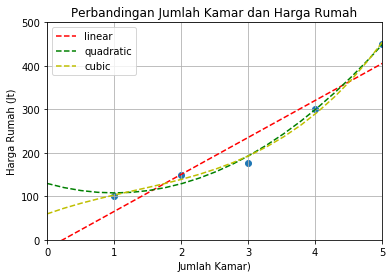

In [44]:
# Code 08

# Training Set
plt.scatter(X_train, y_train)

# Linear
model = LinearRegression()
model.fit(X_train, y_train)
X_vis = np.linspace(0, 25, 100).reshape(-1, 1)
y_vis = model.predict(X_vis)
plt.plot(X_vis, y_vis, '--r', label='linear')

# Quadratic
quadratic_feature = PolynomialFeatures(degree=2)
X_train_quadratic = quadratic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_quadratic, y_train)
X_vis_quadratic = quadratic_feature.transform(X_vis)
y_vis = model.predict(X_vis_quadratic)
plt.plot(X_vis, y_vis, '--g', label='quadratic')

# Cubic
cubic_feature = PolynomialFeatures(degree=3)
X_train_cubic = cubic_feature.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_cubic, y_train)
X_vis_cubic = cubic_feature.transform(X_vis)
y_vis = model.predict(X_vis_cubic)
plt.plot(X_vis, y_vis, '--y', label='cubic')

plt.title('Perbandingan Jumlah Kamar dan Harga Rumah')
plt.xlabel('Jumlah Kamar)')
plt.ylabel('Harga Rumah (Jt)')
plt.legend()
plt.xlim(0, 5)
plt.ylim(0, 500)
plt.grid(True)
plt.show()

Alur berpikir code 08 :

Training Set :
- Pertama-tama, panggil terlebih dahulu "plt.scatter(X_train, y_train)" artinya disini kita akan melakukan plotting dataset yang hasil plottingnya berupa kelima data point atau kelima titik biru (lihat pada hasil code 08).

Linear :
- Lalu berikutnya saya akan membentuk model simple linear regression.
- Pertama-tama, akan dibentuk terlebih dahulu untuk objek modelnya dengan memanggil "LinearRegression()" yang kita tampung kedalam variabel "model".
- Lalu selanjutnya, modelnya akan dilakukannya training dengan menggunakan "X_train" dan "y_train".
- Berikutnya disini saya akan menyiapkan 100 data point dengan jangkauan 0 - 25. Lalu nilai data point ini sebelum ditampung kedalam variabel "X_vis" akan kita reshape dengan parameter (-1, 1).
- Selanjutnya nilai yang ditampung dalam variabel "X_vis" tersebut akan digunakan sebagai features untuk melakukan prediksi dengan memanggil "model.predict(X_vis)" yang kita tampung kedalam variabel "y_vis".
- Lalu berikutnya, hasil prediksi tersebut akan ditampilkan secara visual dengan memanggil "plt.plot(X_vis, y_vis, '--r', label='linear')" yang akan menghasilkan garis merah putus-putus (lihat pada hasil code 08).
- Garis merah tersebut merepresentasikan model simple linear regression yang terbentuk.

Quadratic :
- Lalu berikutnya saya akan membandingkan dengan quadratic. Perbedaannya sebenarnya terletak hanya pada penerapan point polynomial feature dengan degree atau derajat 2.
- Pertama, membentuk terlebih dahulu objeknya dengan memanggil "PolynomialFeatures(degree=2)" yang akan kita tampug kedalam variabel "quadratic_feature".
- Selanjutnya akan digunakan objek "qudratic_feature" tersebut, untuk melakukan fit.transform terhadap nilai dari "X_train" yang hasilnya akan ditampung kedalam variabel "X_train_quadratic".
- Lalu tahapan berikutnya, akan dibentuk objek modelnya yang ditampung kedalam variabel "model".
- Dan selanjutnya saya akan memproses training terhadap model yang tersedia. Hanya saja disini, modelnya akan ditraining dengan menggunakan features yang sudah ditranformasikan kedalam quadratic polynomial. Oleh karenanya, akan dipanggil "(X_train_quadratic, y_train)".
- Berikutnya nilai "X_vis" nya juga sama, akan ditransformasikan menjadi quadratic polynomial yang selanjutnya akan ditampung kedalam variabel "X_vis_quadratic".
- Lalu nilai "X_vis_quadratic tersebut akan digunakan untuk melakukan prediksi.
- Selanjutnya hasil prediksi tersebut akan diplotting dengan memanggil "plt.plot(X_vis, y_vis, '--g', label='quadratic')" (lihat pada code hasil code 08 garis putus-putus berwarna hijau).

Cubic :
- Perbedaan cubic dengan yang lain yaitu sewaktu dibentuk objek polynomial features, serta menyertakan degree nya adalah 3.
- Lalu untuk proses berikutnya sama persis dengan proses linear dan quadratic.
- Untuk cubic polynomial regression disini, akan dilakukan plotting sebagai "--y" artinya akan diploting sebagai garis putus-putus berwarna yellow atau kuning serta menyertakan label "cubic" (lihat pada hasil code 08 garis putus-putus berwarna kuning).

Demikianlah merupakan cara menggunakan "Polynomial Linear Regression" yang merupakan pengembangan dari "Simple Linear Regression" berdasarkan data yang sudah disiapkan yang mengacu pada dataset boston house pricing.

# "Banyak Belajar Biar Bisa Bantu Banyak Orang"

By : Clarence Code Pianist (1973010)